# Laboratorio 3

- Mark Albrand
- Jimena Hernández
- Javier Ramírez

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from __future__ import print_function
import keras
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten

In [65]:
from keras.datasets import cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [66]:
nRows,nCols,nDims = train_images.shape[1:]

train_data = train_images.reshape(train_images.shape[0], nRows, nCols, nDims)
test_data = test_images.reshape(test_images.shape[0], nRows, nCols, nDims)

input_shape = (nRows, nCols, nDims)

train_data = train_data.astype('float32')
test_data = test_data.astype('float32')

print('Training data shape : ', train_images.shape, train_labels.shape)
print('Testing data shape : ', test_images.shape, test_labels.shape)

Training data shape :  (50000, 32, 32, 3) (50000, 1)
Testing data shape :  (10000, 32, 32, 3) (10000, 1)


In [67]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train_data, train_labels, test_size = 0.2, random_state = 0)

print('Training data shape : ', X_train.shape, y_train.shape)
print('Validation data shape : ', X_val.shape, y_val.shape)
print('Testing data shape : ', test_data.shape, test_labels.shape)


Training data shape :  (40000, 32, 32, 3) (40000, 1)
Validation data shape :  (10000, 32, 32, 3) (10000, 1)
Testing data shape :  (10000, 32, 32, 3) (10000, 1)


In [68]:
dim1 = []
dim2 = []

for i in train_data:
    d1, d2 , colors = i.shape
    dim1.append(d1)
    dim2.append(d2)


C:\Users\marka\anaconda3\envs\DataMining11\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\marka\anaconda3\envs\DataMining11\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


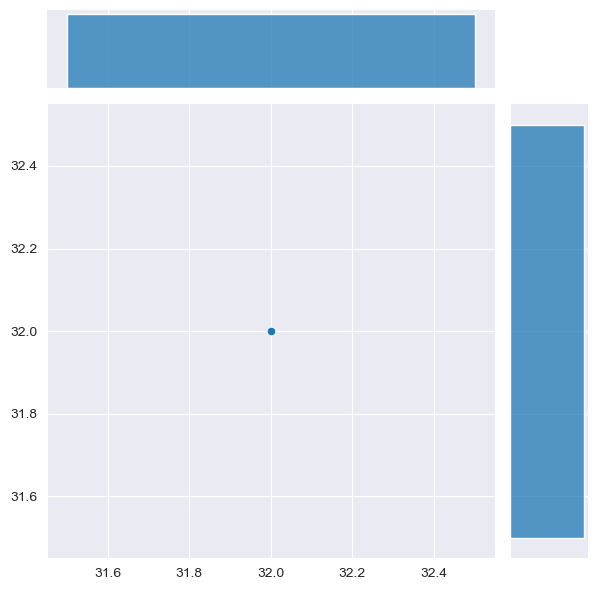

In [69]:
sns.jointplot(x = dim1, y = dim2)

### Encontrando el total de clases 

In [70]:
# Find the unique numbers from the train labels
classes = np.unique(train_labels)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Ground Truth : [3]')

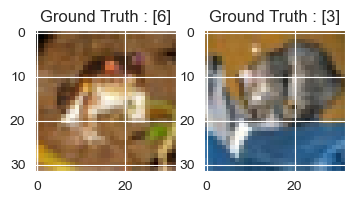

In [71]:
plt.figure(figsize=[4,2])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_labels[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_labels[0]))

### Normalizando los datos

In [72]:
X_train /= 255
test_data /= 255
X_val /= 255

train_labels_one_hot = to_categorical(y_train)
test_labels_one_hot = to_categorical(test_labels)
val_labels_one_hot = to_categorical(y_val)

In [73]:
print('Original label 0 : ', train_labels[0])
print('After conversion to categorical ( one-hot ) : ', train_labels_one_hot[0])

Original label 0 :  [6]
After conversion to categorical ( one-hot ) :  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [74]:
from keras.layers import BatchNormalization
from keras.regularizers import l2

def createModel():
    model = Sequential()
    
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(128, (3, 3), input_shape=input_shape, activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3, 3), input_shape=input_shape, activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())

    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(nClasses, activation='softmax'))
    
    return model

In [75]:
import tensorflow as tf

model1 = createModel()
batch_size = 32
epochs = 50
metrics = [
    "accuracy",
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]

model1.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=metrics, 
    #run_eagerly=True
)

C:\Users\marka\anaconda3\envs\DataMining11\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [76]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [77]:
model1.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_24          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_25          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_26          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_27          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_28          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_29          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         1,29

 Total params: 552,362 (2.11 MB)

 Trainable params: 551,466 (2.10 MB)

 Non-trainable params: 896 (3.50 KB)

In [78]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_generator = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)

train_generator = data_generator.flow(X_train, train_labels_one_hot, batch_size)
# val_generator = data_generator.flow(X_val, val_labels_one_hot, batch_size)

steps_per_epoch = X_train.shape[0] // batch_size
    

In [79]:
# history = model1.fit(
#     X_train,
#     train_labels_one_hot,
#     validation_data=(X_val, val_labels_one_hot),
#     batch_size=batch_size, 
#     epochs=epochs, 
#     callbacks=[early_stop],
#     verbose=1
# )

history = model1.fit(
    train_generator,
    validation_data=(X_val, val_labels_one_hot),
    # steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    # callbacks=[early_stop],
    verbose=2
)

Epoch 1/50


C:\Users\marka\anaconda3\envs\DataMining11\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1250/1250 - 33s - 26ms/step - accuracy: 0.3934 - loss: 1.6855 - precision: 0.5995 - recall: 0.1706 - val_accuracy: 0.4904 - val_loss: 1.4222 - val_precision: 0.6127 - val_recall: 0.3668
Epoch 2/50
1250/1250 - 30s - 24ms/step - accuracy: 0.5501 - loss: 1.2763 - precision: 0.7194 - recall: 0.3769 - val_accuracy: 0.6014 - val_loss: 1.1707 - val_precision: 0.7240 - val_recall: 0.4895
Epoch 3/50
1250/1250 - 30s - 24ms/step - accuracy: 0.6172 - loss: 1.0934 - precision: 0.7580 - recall: 0.4791 - val_accuracy: 0.6681 - val_loss: 0.9734 - val_precision: 0.7735 - val_recall: 0.5638
Epoch 4/50
1250/1250 - 31s - 25ms/step - accuracy: 0.6610 - loss: 0.9797 - precision: 0.7846 - recall: 0.5408 - val_accuracy: 0.6893 - val_loss: 0.9097 - val_precision: 0.7748 - val_recall: 0.6229
Epoch 5/50
1250/1250 - 30s - 24ms/step - accuracy: 0.6896 - loss: 0.9062 - precision: 0.8005 - recall: 0.5811 - val_accuracy: 0.7332 - val_loss: 0.7762 - val_precision: 0.8376 - val_recall: 0.6405
Epoch 6/50
1250/1250 - 30s

<Axes: >

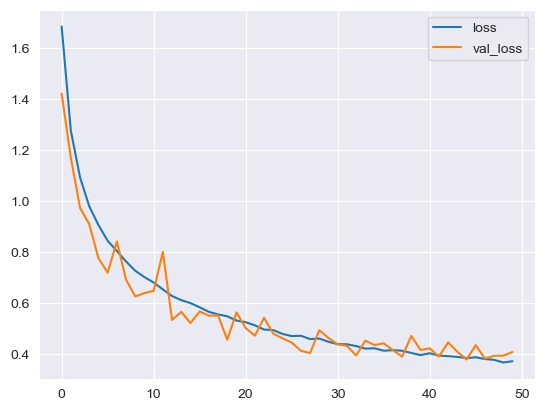

In [80]:
perdidas = pd.DataFrame(model1.history.history)
perdidas[['loss','val_loss']].plot()

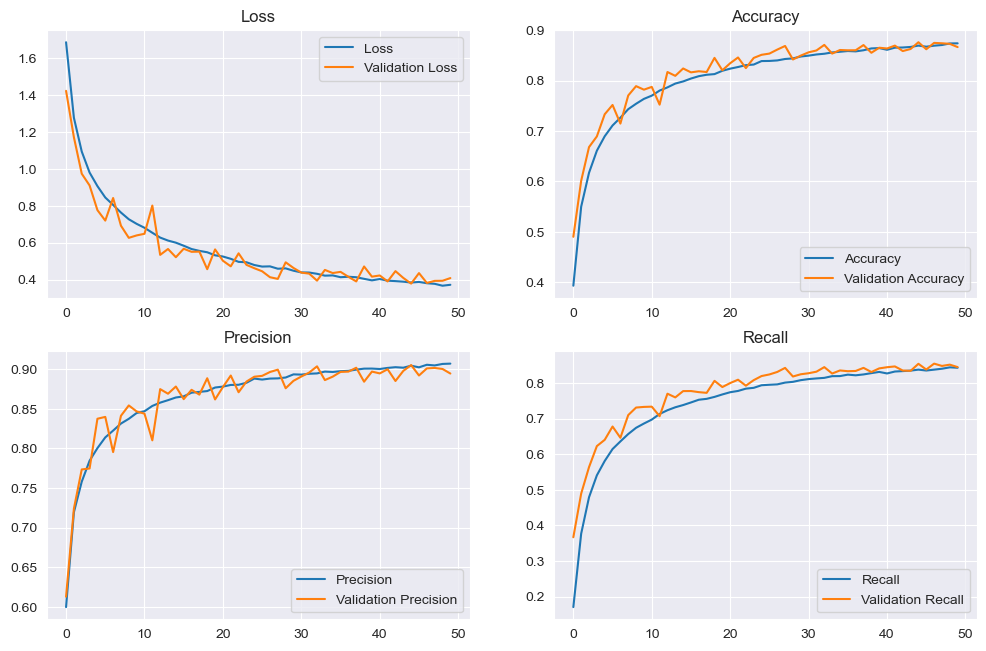

In [81]:
plt.figure(figsize=(12, 16))

plt.subplot(4,2,1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

plt.subplot(4,2,2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(4,2,3)
plt.plot(history.history['precision'], label='Precision')
plt.plot(history.history['val_precision'], label='Validation Precision')
plt.title('Precision')
plt.legend()

plt.subplot(4,2,4)
plt.plot(history.history['recall'], label='Recall')
plt.plot(history.history['val_recall'], label='Validation Recall')
plt.title('Recall')
plt.legend()

plt.show()

In [82]:
model1.evaluate(test_data, test_labels_one_hot)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8617 - loss: 0.4288 - precision: 0.8887 - recall: 0.8391


[0.4357205629348755,
 0.8605999946594238,
 0.8897386789321899,
 0.8375999927520752]

In [83]:
predictions = model1.predict(test_data)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


0 - Avion  
1 - Carros  
2 - Pajaro  
3 - Gatos  
4 - Venado  
5 - Perros  
6 - Ranas  
7 - Caballos  
8 - Botes  
9 - Camiones  

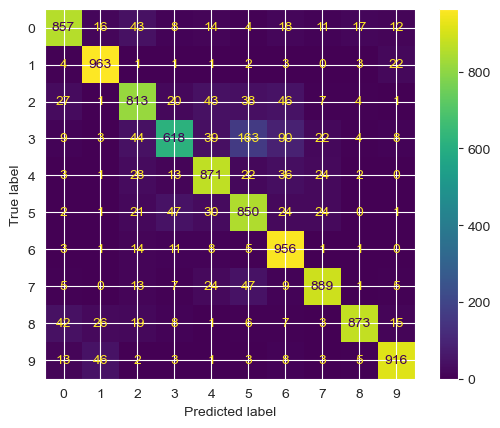

In [84]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(test_labels_one_hot.argmax(axis=1), predictions.argmax(axis=1))

ConfusionMatrixDisplay(cm).plot()

In [85]:
from sklearn.metrics import classification_report

print(classification_report(test_labels_one_hot.argmax(axis=1), predictions.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.89      0.86      0.87      1000
           1       0.91      0.96      0.94      1000
           2       0.81      0.81      0.81      1000
           3       0.84      0.62      0.71      1000
           4       0.84      0.87      0.86      1000
           5       0.75      0.85      0.79      1000
           6       0.80      0.96      0.87      1000
           7       0.90      0.89      0.90      1000
           8       0.96      0.87      0.91      1000
           9       0.93      0.92      0.93      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000

